In [1]:
import pandas as pd
import numpy as np
import wbpy
import plotly 
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.tools.set_credentials_file(username='priyanka.sagi1991', api_key='9joAPlNOQCoQg6iMmtSV')
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
file1 = "Economic_vs_Military.xlsx"
file2 = "GDP_by_$.xlsx"

GDP_df = pd.read_excel(file2)
Aid_df = pd.read_excel(file1)
Aid_df.head()


,Row Labels,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [13]:
Aid_df=Aid_df.rename(columns={"Row Labels":"Country","Grand Total":"Total Aid"})
Aid_df.head()

,Country,Year,Economic,Military,Total Aid
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [15]:
Aid_df= Aid_df[["Country","Year","Total Aid"]]
Aid_df.head()

,Country,Year,Total Aid
0,Angola,2002,1.659227e+08
1,Angola,2003,2.159894e+08
2,Angola,2004,1.526873e+08
3,Angola,2005,8.350252e+07
4,Angola,2006,9.699894e+07


In [5]:
GDP_df.head()

,Country Name,Year,Total
0,Angola,2002,1.528559e+10
1,Angola,2003,1.781271e+10
2,Angola,2004,2.355205e+10
3,Angola,2005,3.697092e+10
4,Angola,2006,5.238101e+10


In [6]:
GDP_df = GDP_df.rename(columns={"Total":"GDP","Country Name":"Country","Year":"Year"})
GDP_df.head()

,Country,Year,GDP
0,Angola,2002,1.528559e+10
1,Angola,2003,1.781271e+10
2,Angola,2004,2.355205e+10
3,Angola,2005,3.697092e+10
4,Angola,2006,5.238101e+10


In [7]:
GDP_plot_df=GDP_df.set_index('Year', drop=True)
GDP_plot_df


,Country,GDP
Year,,
2002,Angola,1.528559e+10
2003,Angola,1.781271e+10
2004,Angola,2.355205e+10
2005,Angola,3.697092e+10
2006,Angola,5.238101e+10
2007,Angola,6.526645e+10
2008,Angola,8.853861e+10
2009,Angola,7.030716e+10
2010,Angola,8.379950e+10


In [8]:
Combined_data = pd.merge(Aid_df,GDP_plot_df, on=['Country','Year'])
Combined_data

,Country,Year,Economic,Military,Grand Total,GDP
0,Angola,2002,1.659227e+08,0.000000e+00,1.659227e+08,1.528559e+10
1,Angola,2003,2.155944e+08,3.950575e+05,2.159894e+08,1.781271e+10
2,Angola,2004,1.520490e+08,6.382582e+05,1.526873e+08,2.355205e+10
3,Angola,2005,8.311513e+07,3.873851e+05,8.350252e+07,3.697092e+10
4,Angola,2006,9.623060e+07,7.683433e+05,9.699894e+07,5.238101e+10
5,Angola,2007,6.191552e+07,5.123027e+05,6.242783e+07,6.526645e+10
6,Angola,2008,6.537215e+07,3.967068e+05,6.576886e+07,8.853861e+10
7,Angola,2009,6.095525e+07,5.356674e+05,6.149092e+07,7.030716e+10
8,Angola,2010,1.114652e+08,4.178502e+05,1.118831e+08,8.379950e+10
9,Angola,2011,8.945588e+07,4.589350e+05,8.991482e+07,1.117897e+11


In [9]:
Combined_Aid_GDP = Combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})

Combined_Aid_GDP

,Country,Year,Economic,Military,Total Aid,GDP
0,Angola,2002,1.659227e+08,0.000000e+00,1.659227e+08,1.528559e+10
1,Angola,2003,2.155944e+08,3.950575e+05,2.159894e+08,1.781271e+10
2,Angola,2004,1.520490e+08,6.382582e+05,1.526873e+08,2.355205e+10
3,Angola,2005,8.311513e+07,3.873851e+05,8.350252e+07,3.697092e+10
4,Angola,2006,9.623060e+07,7.683433e+05,9.699894e+07,5.238101e+10
5,Angola,2007,6.191552e+07,5.123027e+05,6.242783e+07,6.526645e+10
6,Angola,2008,6.537215e+07,3.967068e+05,6.576886e+07,8.853861e+10
7,Angola,2009,6.095525e+07,5.356674e+05,6.149092e+07,7.030716e+10
8,Angola,2010,1.114652e+08,4.178502e+05,1.118831e+08,8.379950e+10
9,Angola,2011,8.945588e+07,4.589350e+05,8.991482e+07,1.117897e+11


In [10]:
#Renaming the file as it will include 2 year lag in Economic and Military Aid
Combined_Aid_GDP_2 = Combined_Aid_GDP.rename(index=str, columns={"Economic": "Economic_2", "Military": "Military_2"})
Combined_Aid_GDP_4 = Combined_Aid_GDP.rename(index=str, columns={"Economic": "Economic_4", "Military": "Military_4"})
Combined_Aid_GDP_6 = Combined_Aid_GDP.rename(index=str, columns={"Economic": "Economic_6", "Military": "Military_6"})


#adding two years to see effect
Combined_Aid_GDP_2['Economic_2'] = Combined_Aid_GDP_2['Economic_2'].shift(-2)
Combined_Aid_GDP_2['Military_2'] = Combined_Aid_GDP_2['Military_2'].shift(-2)
Combined_Aid_GDP_2= Combined_Aid_GDP_2.dropna()    

#adding four years to see effect
Combined_Aid_GDP_4['Economic_4'] = Combined_Aid_GDP_4['Economic_4'].shift(-4)
Combined_Aid_GDP_4['Military_4'] = Combined_Aid_GDP_4['Military_4'].shift(-4)
Combined_Aid_GDP_4= Combined_Aid_GDP_4.dropna()

#adding six years to see effect
Combined_Aid_GDP_6['Economic_6'] = Combined_Aid_GDP_6['Economic_6'].shift(-6)
Combined_Aid_GDP_6['Military_6'] = Combined_Aid_GDP_6['Military_6'].shift(-6)
Combined_Aid_GDP_6= Combined_Aid_GDP_6.dropna()

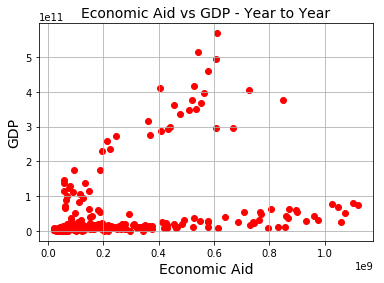

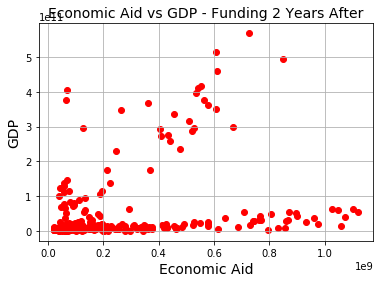

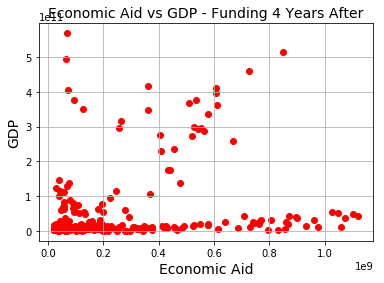

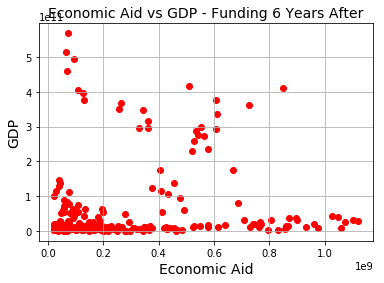

In [11]:
#Scatter Economic vs Stability for Year on Year 
plt.scatter(Combined_Aid_GDP['Economic'], Combined_Aid_GDP['GDP'], color='red')
plt.title('Economic Aid vs GDP - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for funding 2 years after 
plt.scatter(Combined_Aid_GDP_2['Economic_2'], Combined_Aid_GDP_2['GDP'], color='red')
plt.title('Economic Aid vs GDP - Funding 2 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(Combined_Aid_GDP_4['Economic_4'], Combined_Aid_GDP_4['GDP'], color='red')
plt.title('Economic Aid vs GDP - Funding 4 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(Combined_Aid_GDP_6['Economic_6'], Combined_Aid_GDP_6['GDP'], color='red')
plt.title('Economic Aid vs GDP - Funding 6 Years After', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('GDP', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding on Year
plt.scatter(Combined_Aid_Stability['Military'], Combined_Aid_Stability['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 2 years after
plt.scatter(Combined_Aid_Stability_2['Military_2'], Combined_Aid_Stability_2['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 2 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 4 years after
plt.scatter(Combined_Aid_Stability_4['Military_4'], Combined_Aid_Stability_4['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 4 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()
#Scatter Military vs Stability for funding 6 years after
plt.scatter(Combined_Aid_Stability_6['Military_6'], Combined_Aid_Stability_6['Total Stability'], color='green')
plt.title('Military Aid vs Stability Rate - Funding 6 Years After', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Stability Rate', fontsize=14)
plt.grid(True)
plt.show()